In [1]:
import numpy
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import display, Markdown

In [2]:
dates = ["12.01.2019", "09.03.2019", "22.06.2019", "25.07.2019", "25.10.2019", "14.12.2019", "18.01.2019", "14.03.2020", "21.06.2020", "15.08.2020", "26.09.2020"]
season_2 = ["12.01.2019", "09.03.2019", "22.06.2019", "25.07.2019", "25.10.2019", "14.12.2019", "18.01.2019", "14.03.2020"]
season_3 = ["21.06.2020", "15.08.2020", "26.09.2020"]

In [3]:
hide_text = False

# Player Klasse 

In [4]:
class Player():
    
    def __init__(self, name_):
        self.name = name_
        self.dates = [] 
        self.pudel = []
        self.runden = []
        self.abgeraeumt = []
        self.kranz = []
        
        self.summe_pudel = 0
        self.mean_pudel = 0
        self.pudelkoenig = []
    
    def add_data(self, date, pudel_count, runden_count, abgeraumt_count, kranz_count):
        self.dates.append(date)
        self.pudel.append(pudel_count)
        self.runden.append(runden_count)
        self.abgeraeumt.append(abgeraumt_count)
        self.kranz.append(kranz_count)   
        

In [5]:
#Calculate mean_pudel for season
def calculate_sum_and_mean(Players, i, season):

    pudel_list = []
    runden_list = []
    abgeraeumt_list = []

    for k in range(len(Players[i].dates)):
        if Players[i].dates[k] in season:
            pudel_list.append(Players[i].pudel[k])
            runden_list.append(Players[i].runden[k])
            abgeraeumt_list.append(Players[i].abgeraeumt[k])
    
    sum_pudel = sum(pudel_list) 
    sum_runden = sum(runden_list) 
    sum_abgeraeumt = sum(abgeraeumt_list) 

    mean_pudel = sum_pudel/float(len(pudel_list))
    mean_runden = sum_runden/float(len(runden_list))
    mean_abgeraeumt = sum_abgeraeumt/float(len(abgeraeumt_list))
    
    return sum_pudel, mean_pudel, sum_runden, mean_runden, sum_abgeraeumt, mean_abgeraeumt

def calculate_sum_pudelkoenige_per_season(Players, i, season):
    
    count = 0
    sum_pudelkoenige = 0
    
    for k in range(len(Players[i].pudelkoenig)):
        if Players[i].pudelkoenig[k] in season:
            sum_pudelkoenige = sum_pudelkoenige + 1
    
    return sum_pudelkoenige

In [6]:
def plot_for_season(season):
    
    fig, axs = plt.subplots(3, 2)
    fig.set_figheight(15)
    fig.set_figwidth(30)
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1)

    season_members = []

    for i in range(len(Players)):
        for j in range(len(season)):
            for k in range(len(Players[i].dates)):
                if season[j] == Players[i].dates[k]:
                    if not Players[i].name in season_members:
                        season_members.append(Players[i].name )                

    for i in range(len(Players)):
        if not Players[i].name in season_members:
            continue

        #Calculate mean and sum pudel, runden and abgeraeumt per season
        sum_pudel, mean_pudel, sum_runden, mean_runden, sum_abgeraeumt, mean_abgeraeumnt = calculate_sum_and_mean(Players, i, season)

        #Calculate number of pudelkoenige per player and season  
        sum_pudelkoenige = calculate_sum_pudelkoenige_per_season(Players, i, season)

        axs[0, 0].bar(Players[i].name, mean_pudel)    
        axs[0, 1].bar(Players[i].name, sum_pudelkoenige)

        axs[1, 0].bar(Players[i].name, sum_runden)
        axs[1, 1].bar(Players[i].name, mean_runden)

        axs[2, 0].bar(Players[i].name, sum_abgeraeumt)
        axs[2, 1].bar(Players[i].name, mean_abgeraeumnt)

    axs[0, 0].set_title("Wie viele Pudel wurden durchschnittlich pro Spiel geworfen?")
    axs[0, 1].set_title("Wer ist am häufigstsen Pudelkönig geworden?")
    axs[1, 0].set_title("Wie viele Runden wurden insgesamt ausgegeben?")
    axs[1, 1].set_title("Wie viele Runden werden durchschnittlich pro Spiel ausgegeben?")
    axs[2, 0].set_title("Wie oft wurde insgesamt abgeräumt?")
    axs[2, 1].set_title("Wie oft wird durchschnittlich pro Spiel abgeräumt?")

    if season == season_2:
        fig.savefig('season_2.png', facecolor=fig.get_facecolor())
    if season == season_3:
        fig.savefig('season_3.png', facecolor=fig.get_facecolor())  
    if season == dates:
        fig.savefig('all_seasons.png', facecolor=fig.get_facecolor())

# Daten

In [7]:
Mario = Player("Mario")
Mario.add_data("12.01.2019", 13, 2, 1, 0)
Mario.add_data("09.03.2019", 8, 0, 0, 0)
Mario.add_data("22.06.2019", 12, 2, 0, 0)
Mario.add_data("25.07.2019", 9, 1, 0, 0)
Mario.add_data("25.10.2019", 14, 1, 0, 0)
Mario.add_data("14.12.2019", 5, 5, 0, 0)
Mario.add_data("18.01.2019", 6, 0, 0, 0)
#Mario.add_data("14.03.2020")
Mario.add_data("21.06.2020", 8, 2, 1, 0)
Mario.add_data("15.08.2020", 13, 4, 0, 1)
Mario.add_data("26.09.2020", 10, 2, 0, 0)


In [8]:
Fabian = Player("Fabian")
Fabian.add_data("12.01.2019", 6, 4, 2, 0)
Fabian.add_data("09.03.2019", 7, 0, 1, 0)
#Fabian.add_data("22.06.2019")
Fabian.add_data("25.07.2019", 10, 0, 0, 0)
Fabian.add_data("25.10.2019", 10, 0, 0, 0)
Fabian.add_data("14.12.2019", 3, 3, 3, 0)
Fabian.add_data("18.01.2019", 6, 0, 0, 0)
Fabian.add_data("14.03.2020", 3, 1, 0, 0)
#Fabian.add_data("21.06.2020")
Fabian.add_data("15.08.2020", 6, 2, 0, 1)
Fabian.add_data("26.09.2020", 4, 2, 0, 0)


In [9]:
Max = Player("Max")
Max.add_data("12.01.2019", 17, 1, 0, 0)
Max.add_data("09.03.2019", 20, 0, 0, 0)
Max.add_data("22.06.2019", 17, 3, 2, 0)
Max.add_data("25.07.2019", 12, 2, 0, 0)
#Max.add_data("25.10.2019")
Max.add_data("14.12.2019", 16, 5, 0, 0)
Max.add_data("18.01.2019", 12, 3, 0, 0)
Max.add_data("14.03.2020", 13, 2, 0, 0)
Max.add_data("21.06.2020", 15, 3, 1, 0)
Max.add_data("15.08.2020", 19, 2, 1, 0)
Max.add_data("26.09.2020", 14, 2, 0, 0)


In [10]:
Raphael = Player("Raphael")
Raphael.add_data("12.01.2019", 19, 1, 0, 0)
Raphael.add_data("09.03.2019", 10, 0, 0, 0)
Raphael.add_data("22.06.2019", 18, 3, 0, 0)
Raphael.add_data("25.07.2019", 12, 1, 0, 0)
Raphael.add_data("25.10.2019", 11, 3, 0, 0)
Raphael.add_data("14.12.2019", 9, 2, 0, 0)
Raphael.add_data("18.01.2019", 16, 1, 0, 0)
Raphael.add_data("14.03.2020", 7, 1, 0, 0)
Raphael.add_data("21.06.2020", 7, 2, 0, 0)
Raphael.add_data("15.08.2020", 19, 1, 1, 0)
Raphael.add_data("26.09.2020", 7, 1, 0, 0)


In [11]:
Haiko = Player("Haiko")
Haiko.add_data("12.01.2019", 18, 3, 0, 0)
Haiko.add_data("09.03.2019", 12, 0, 1, 0)
#Haiko.add_data("22.06.2019")
Haiko.add_data("25.07.2019", 15, 2, 0, 0)
Haiko.add_data("25.10.2019", 18, 3, 0, 0)
Haiko.add_data("14.12.2019", 12, 3, 1, 0)
#Haiko.add_data("18.01.2019")
Haiko.add_data("14.03.2020", 4, 0, 1, 0)
Haiko.add_data("21.06.2020", 4, 2, 0, 0)
#Haiko.add_data("15.08.2020")
Haiko.add_data("26.09.2020", 8, 2, 0, 0)


In [12]:
Gustav = Player("Gustav")
#Gustav.add_data("12.01.2019")
#Gustav.add_data("09.03.2019")
Gustav.add_data("22.06.2019", 21, 3, 2, 0)
#Gustav.add_data("25.07.2019")
Gustav.add_data("25.10.2019", 20, 3, 0, 0)
Gustav.add_data("14.12.2019", 6, 3, 0, 0)
Gustav.add_data("18.01.2019", 11, 1, 0, 0)
Gustav.add_data("14.03.2020", 9, 2, 0, 0)
Gustav.add_data("21.06.2020", 3, 4, 0, 0)
Gustav.add_data("15.08.2020", 17, 1, 0, 0)
Gustav.add_data("26.09.2020", 5, 2, 0, 0)


In [13]:
Lukas = Player("Lukas")
Lukas.add_data("12.01.2019", 13, 3, 0, 0)
Lukas.add_data("09.03.2019", 10, 0, 1, 0)
Lukas.add_data("22.06.2019", 10, 4, 0, 0)
Lukas.add_data("25.07.2019", 8, 2, 0, 0)
Lukas.add_data("25.10.2019", 14, 5, 0, 0)
#Lukas.add_data("14.12.2019")
Lukas.add_data("18.01.2019", 7, 2, 0, 0)
Lukas.add_data("14.03.2020", 3, 2, 0, 0)
Lukas.add_data("21.06.2020", 4, 3, 1, 0)
Lukas.add_data("15.08.2020", 16, 4, 0, 0)
Lukas.add_data("26.09.2020", 10, 4, 0, 0)


In [14]:
Charles = Player("Charles")
Charles.add_data("12.01.2019", 9, 1, 0, 0)
Charles.add_data("09.03.2019", 7, 0, 0, 0)
#Charles.add_data("22.06.2019")
#Charles.add_data("25.07.2019")
#Charles.add_data("25.10.2019")
#Charles.add_data("14.12.2019")
Charles.add_data("18.01.2019", 5, 2, 0, 0)
#Charles.add_data("14.03.2020")
#Charles.add_data("21.06.2020")
#Charles.add_data("15.08.2020")
#Charles.add_data("26.09.2020")


In [15]:
Thomas = Player("Thomas")
Thomas.add_data("26.09.2020", 16, 5, 0, 0)

In [16]:
 Players = [Mario, Fabian, Max, Raphael, Haiko, Gustav, Lukas, Charles, Thomas]

# Auswertung

<strong>Teilnahmestatistik:</strong><br/>

Mario hat an folgenden offiziellen Kegelveranstaltungen teilgenommen:
['12.01.2019', '09.03.2019', '22.06.2019', '25.07.2019', '25.10.2019', '14.12.2019', '18.01.2019', '21.06.2020', '15.08.2020', '26.09.2020']
Das sind insgesamt 10 Teilnahmen!


Fabian hat an folgenden offiziellen Kegelveranstaltungen teilgenommen:
['12.01.2019', '09.03.2019', '25.07.2019', '25.10.2019', '14.12.2019', '18.01.2019', '14.03.2020', '15.08.2020', '26.09.2020']
Das sind insgesamt 9 Teilnahmen!


Max hat an folgenden offiziellen Kegelveranstaltungen teilgenommen:
['12.01.2019', '09.03.2019', '22.06.2019', '25.07.2019', '14.12.2019', '18.01.2019', '14.03.2020', '21.06.2020', '15.08.2020', '26.09.2020']
Das sind insgesamt 10 Teilnahmen!


Raphael hat an folgenden offiziellen Kegelveranstaltungen teilgenommen:
['12.01.2019', '09.03.2019', '22.06.2019', '25.07.2019', '25.10.2019', '14.12.2019', '18.01.2019', '14.03.2020', '21.06.2020', '15.08.2020', '26.09.2020']
Das sind insgesamt 11 Teilnahmen!


Haiko hat an

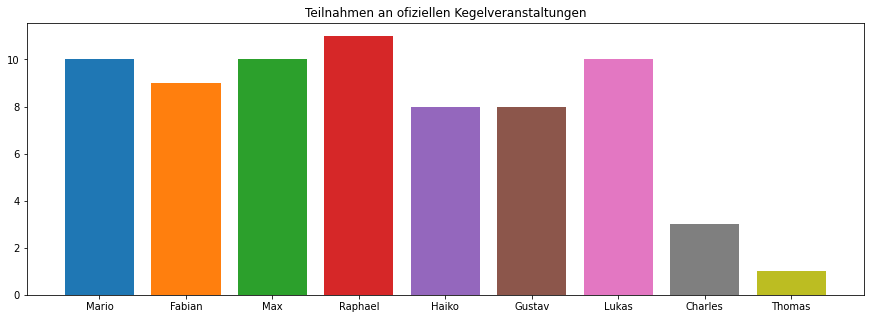

Der Spieler mit den meisten Teilnahmen ist: Raphael. 
Herzlichen Glückwunsch, echt starke Leistung!

Der Spieler mit den wenigsten Teilnahmen ist: Thomas. 
Das kannst du besser!

________________________________________________________________________________________________
________________________________________________________________________________________________
________________________________________________________________________________________________






<strong>Pudelstatistik:</strong><br/>

Es folgt die Pudel Auswertung für: Mario
Geworfene Pudel am 12.01.2019: 13
Geworfene Pudel am 09.03.2019: 8
Geworfene Pudel am 22.06.2019: 12
Geworfene Pudel am 25.07.2019: 9
Geworfene Pudel am 25.10.2019: 14
Geworfene Pudel am 14.12.2019: 5
Geworfene Pudel am 18.01.2019: 6
Geworfene Pudel am 21.06.2020: 8
Geworfene Pudel am 15.08.2020: 13
Geworfene Pudel am 26.09.2020: 10
-----------
Mario hat insgesamt: 98 Pudel geworfen!
Mario wirft im Schnitt 9.8 Pudel pro Termin!


Es folgt die Pudel Auswertung für: Fabian
Geworfene Pudel am 12.01.2019: 6
Geworfene Pudel am 09.03.2019: 7
Geworfene Pudel am 25.07.2019: 10
Geworfene Pudel am 25.10.2019: 10
Geworfene Pudel am 14.12.2019: 3
Geworfene Pudel am 18.01.2019: 6
Geworfene Pudel am 14.03.2020: 3
Geworfene Pudel am 15.08.2020: 6
Geworfene Pudel am 26.09.2020: 4
-----------
Fabian hat insgesamt: 55 Pudel geworfen!
Fabian wirft im Schnitt 6.1 Pudel pro Termin!


Es folgt die Pudel Auswertung für: Max
Geworfene Pudel am 12.01.2019: 17
Geworfene 

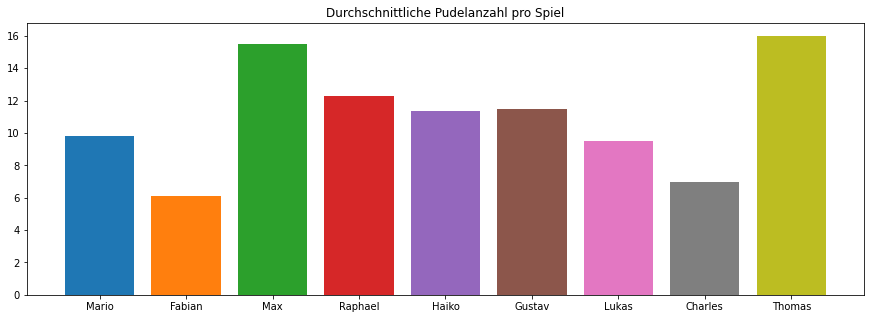

Im Schnitt wirft Fabian mit 6.1 die wenigsten Pudel pro Termin!
Du kannst stolz auf dich sein!

Im Schnitt wirft Thomas mit 16.0 die meisten Pudel pro Termin!
Da sehe ich noch Verbesserungspotential!

________________________________________________________________________________________________
________________________________________________________________________________________________
________________________________________________________________________________________________


<strong>Pudelkönige Statistik:</strong><br/>

Am 12.01.2019 war folgender Spieler Pudelköning: 
Raphael

Am 09.03.2019 war folgender Spieler Pudelköning: 
Max

Am 22.06.2019 war folgender Spieler Pudelköning: 
Gustav

Am 25.07.2019 war folgender Spieler Pudelköning: 
Haiko

Am 25.10.2019 war folgender Spieler Pudelköning: 
Gustav

Am 14.12.2019 war folgender Spieler Pudelköning: 
Max

Am 18.01.2019 war folgender Spieler Pudelköning: 
Raphael

Am 14.03.2020 war folgender Spieler Pudelköning: 
Max

Am 21.06.2020 war folgender Spieler Pudelköning: 
Max

Am 15.08.2020 waren folgende Spieler Pudelköning: 
Max
Raphael

Am 26.09.2020 war folgender Spieler Pudelköning: 
Thomas



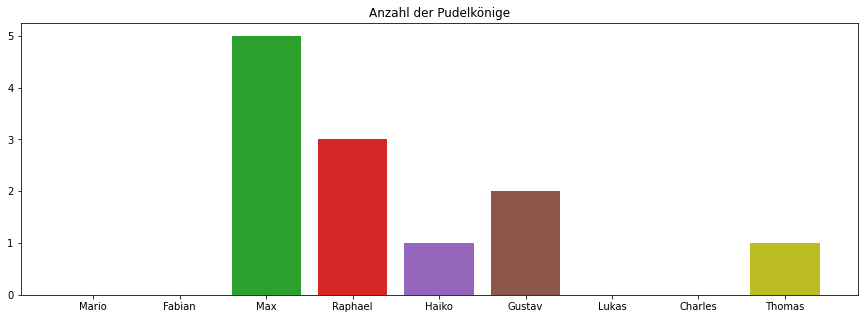

Bisher ist ['Max'] mit [5] mal am häufigsten Pudelkönig geworden!
________________________________________________________________________________________________
________________________________________________________________________________________________
________________________________________________________________________________________________






<strong>Rundenstatistik:</strong><br/>

Es folgt die Runden Auswertung für: Mario
Runden ausgegeben am 12.01.2019: 2
Runden ausgegeben am 09.03.2019: 0
Runden ausgegeben am 22.06.2019: 2
Runden ausgegeben am 25.07.2019: 1
Runden ausgegeben am 25.10.2019: 1
Runden ausgegeben am 14.12.2019: 5
Runden ausgegeben am 18.01.2019: 0
Runden ausgegeben am 21.06.2020: 2
Runden ausgegeben am 15.08.2020: 4
Runden ausgegeben am 26.09.2020: 2
-----------
Mario hat insgesamt: 19 Runden ausgegeben!
Mario gibt im Schnitt 1.9 Runden pro Termin aus!


Es folgt die Runden Auswertung für: Fabian
Runden ausgegeben am 12.01.2019: 4
Runden ausgegeben am 09.03.2019: 0
Runden ausgegeben am 25.07.2019: 0
Runden ausgegeben am 25.10.2019: 0
Runden ausgegeben am 14.12.2019: 3
Runden ausgegeben am 18.01.2019: 0
Runden ausgegeben am 14.03.2020: 1
Runden ausgegeben am 15.08.2020: 2
Runden ausgegeben am 26.09.2020: 2
-----------
Fabian hat insgesamt: 12 Runden ausgegeben!
Fabian gibt im Schnitt 1.3 Runden pro Termin aus!


Es folgt die Runden Auswertung für: 

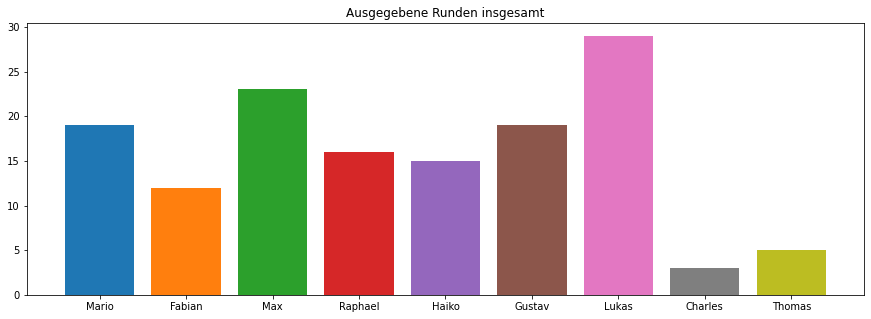

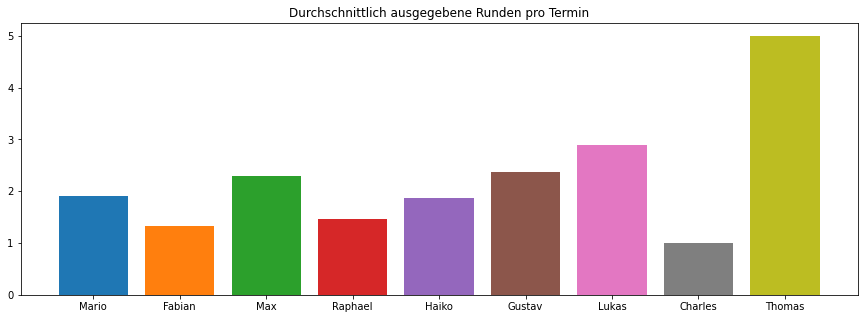

________________________________________________________________________________________________
________________________________________________________________________________________________
________________________________________________________________________________________________






<strong>Abgeräumt Statistik:</strong><br/>

Es folgt die 'Abräumen' Auswertung für: Mario
Abgeräumt am 12.01.2019: 1
Abgeräumt am 09.03.2019: 0
Abgeräumt am 22.06.2019: 0
Abgeräumt am 25.07.2019: 0
Abgeräumt am 25.10.2019: 0
Abgeräumt am 14.12.2019: 0
Abgeräumt am 18.01.2019: 0
Abgeräumt am 21.06.2020: 1
Abgeräumt am 15.08.2020: 0
Abgeräumt am 26.09.2020: 0
-----------
Mario hat insgesamt: 2 mal alle Kegel abgeräumt!
Mario räumt im Schnitt 0.2 mal alle Kegel ab!


Es folgt die 'Abräumen' Auswertung für: Fabian
Abgeräumt am 12.01.2019: 2
Abgeräumt am 09.03.2019: 1
Abgeräumt am 25.07.2019: 0
Abgeräumt am 25.10.2019: 0
Abgeräumt am 14.12.2019: 3
Abgeräumt am 18.01.2019: 0
Abgeräumt am 14.03.2020: 0
Abgeräumt am 15.08.2020: 0
Abgeräumt am 26.09.2020: 0
-----------
Fabian hat insgesamt: 6 mal alle Kegel abgeräumt!
Fabian räumt im Schnitt 0.7 mal alle Kegel ab!


Es folgt die 'Abräumen' Auswertung für: Max
Abgeräumt am 12.01.2019: 0
Abgeräumt am 09.03.2019: 0
Abgeräumt am 22.06.2019: 2
Abgeräumt am 25.07.2019: 0
Abgeräumt am 14.12.201

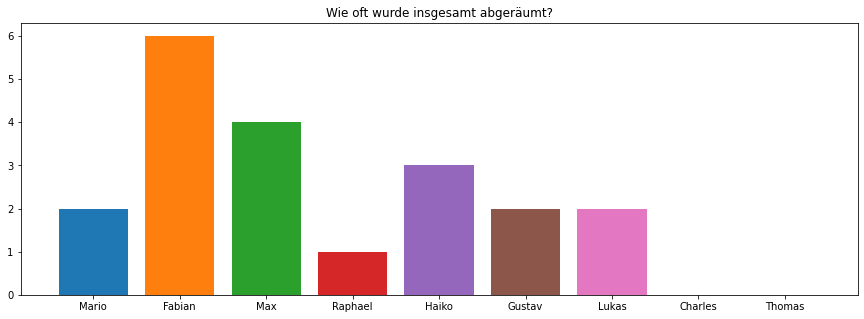

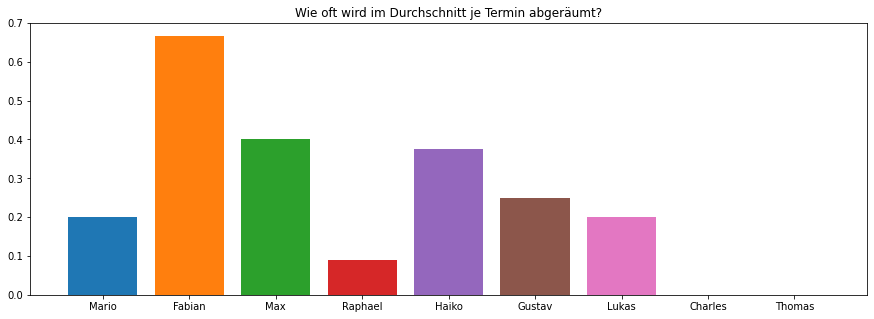

In [17]:
########################################################################################################
########################################## TEILNAHMESTATISTIK ##########################################
########################################################################################################

display(Markdown('<strong>Teilnahmestatistik:</strong><br/>'))
if not hide_text:
    for i in range(len(Players)):
        print(Players[i].name + " hat an folgenden offiziellen Kegelveranstaltungen teilgenommen:")
        print(Players[i].dates)
        print("Das sind insgesamt " + str(len(Players[i].dates)) + " Teilnahmen!")
        print ("\n")
    
print ("--------------------------------------------------------------------------------------------------\n")
    

#Wer hat am häufigsten/ am seltesten teilgenommen?
player_maximale_teilanme = []
teilnahmen = []

for i in range(len(Players)):
  
    teilnahmen_ = len(Players[i].dates)
    teilnahmen.append(teilnahmen_)

maximale_teilnahmen = max(teilnahmen)  
minimale_teilnahmen = min(teilnahmen)  
player_max_teilnahmen = []
player_min_teilnahmen = []

for i in range(len(Players)):
    
    if len(Players[i].dates) == maximale_teilnahmen:
        player_max_teilnahmen.append(Players[i].name)
        
    if len(Players[i].dates) == minimale_teilnahmen:
        player_min_teilnahmen.append(Players[i].name)

plt.rcParams["figure.figsize"] = [15, 5]
plt.figure(0)
plt.title("Teilnahmen an ofiziellen Kegelveranstaltungen")
for i in range(len(Players)):
    plt.bar(Players[i].name, len(Players[i].dates))
plt.show()

        
        
if len(player_max_teilnahmen) == 1:
    print("Der Spieler mit den meisten Teilnahmen ist: " + str(player_max_teilnahmen[0]) + ". \nHerzlichen Glückwunsch, echt starke Leistung!\n")
    
if len(player_max_teilnahmen) > 1:
    print("Die Spieler mit den meisten Teilnahmen sind: " + str(player_max_teilnahmen) + ". \nHerzlichen Glückwunsch, echt starke Leistung!\n")

if len(player_min_teilnahmen) == 1:
    print("Der Spieler mit den wenigsten Teilnahmen ist: " + str(player_min_teilnahmen[0]) + ". \nDas kannst du besser!\n")
    
if len(player_min_teilnahmen) > 1:
    print("Die Spieler mit den wenigsten Teilnahmen sind: " + str(player_min_teilnahmen) + ". \nDas kannst du besser!\n")
 
print("________________________________________________________________________________________________")
print("________________________________________________________________________________________________")
print("________________________________________________________________________________________________")

 
########################################################################################################
############################################ PUDELSTATISTIK ############################################
########################################################################################################
print("\n\n\n")
display(Markdown('<strong>Pudelstatistik:</strong><br/>'))
    
for i in range(len(Players)):
    if not hide_text:
        print("Es folgt die Pudel Auswertung für: " + Players[i].name)
    
    summe_pudel = 0
    for j in range(len(Players[i].dates)):
        if not hide_text:
            print ("Geworfene Pudel am " + str(Players[i].dates[j]) + ": " + str(Players[i].pudel[j]))
        summe_pudel = summe_pudel + Players[i].pudel[j]
    
    mean_pudel = summe_pudel / len(Players[i].dates)
    Players[i].summe_pudel = summe_pudel
    Players[i].mean_pudel = mean_pudel
    
    if not hide_text:
        print("-----------")
        print (Players[i].name + " hat insgesamt: " +  str(Players[i].summe_pudel) + " Pudel geworfen!")
        print (Players[i].name + " wirft im Schnitt " +  str(round(Players[i].mean_pudel,1)) + " Pudel pro Termin!")
        print ("\n")


#Wer wirft die meisten/wenigsten Pudel pro Termin?
min_mean_pudel = 0
player_min_mean_pudel = ""

max_mean_pudel = 0
player_max_mean_pudel = ""

for i in range(len(Players)):
    if i == 0:
        min_mean_pudel = Players[i].mean_pudel
        player_min_mean_pudel = Players[i].name
        max_mean_pudel = Players[i].mean_pudel
        player_max_mean_pudel = Players[i].name
        
    else:
        if Players[i].mean_pudel < min_mean_pudel:
            min_mean_pudel = Players[i].mean_pudel
            player_min_mean_pudel = Players[i].name
            
        if Players[i].mean_pudel > max_mean_pudel:
            max_mean_pudel = Players[i].mean_pudel
            player_max_mean_pudel = Players[i].name
            
plt.figure(1)
plt.title("Durchschnittliche Pudelanzahl pro Spiel")
for i in range(len(Players)):
    plt.bar(Players[i].name, Players[i].mean_pudel)
plt.rcParams["figure.figsize"] = [15, 5]
plt.show()

print("Im Schnitt wirft " + player_min_mean_pudel + " mit " + str(round(min_mean_pudel,1)) + " die wenigsten Pudel pro Termin!\nDu kannst stolz auf dich sein!\n") 
print("Im Schnitt wirft " + player_max_mean_pudel + " mit " + str(round(max_mean_pudel,1)) + " die meisten Pudel pro Termin!\nDa sehe ich noch Verbesserungspotential!\n")                   

   
print("________________________________________________________________________________________________")
print("________________________________________________________________________________________________")
print("________________________________________________________________________________________________")



display(Markdown('<strong>Pudelkönige Statistik:</strong><br/>'))

#Pudelkönig
for i in range(len(dates)):
    
    pudel_am_termin = []
    spieler_am_termin = []
    
    for j in range(len(Players)):
        if dates[i] in Players[j].dates:
            index = Players[j].dates.index(dates[i]) 
            pudel_am_termin.append(Players[j].pudel[index])
            spieler_am_termin.append(Players[j].name)

    max_pudel = max(pudel_am_termin)

    pudelkoenige = []

    for j in range(len(pudel_am_termin)):
        if pudel_am_termin[j] == max_pudel:
            pudelkoenige.append(spieler_am_termin[j])
            
    pudelkoenige = np.asarray(pudelkoenige)
      
    printed = False
    for l in range(len(pudelkoenige)):
        for j in range(len(Players)):
            if Players[j].name == pudelkoenige[l]:
                Players[j].pudelkoenig.append(dates[i])
                if len(pudelkoenige) == 1 and not hide_text:
                    print ("Am " + dates[i] + " war folgender Spieler Pudelköning: \n" + Players[j].name + "\n")
                if len(pudelkoenige) > 1 and not hide_text:
                    if printed == False:
                        print ("Am " + dates[i] + " waren folgende Spieler Pudelköning: \n" + Players[j].name)
                    if printed == True:
                        print (Players[j].name + "\n")

                    printed = True
                    

    
plt.figure(2)
plt.title("Anzahl der Pudelkönige")
for i in range(len(Players)):
    plt.bar(Players[i].name, len(Players[i].pudelkoenig))
plt.rcParams["figure.figsize"] = [15, 5]
plt.show()


            
for i in range(len(Players)):
    if i == 0:
        anzahl_pk = [len(Players[i].pudelkoenig)]
        player_pk = [Players[i].name]

    if i > 0:
        if len(Players[i].pudelkoenig) == anzahl_pk[0]:
            anzahl_pk.append(len(Players[i].pudelkoenig))
            player_pk.append(Players[i].name)
        if len(Players[i].pudelkoenig) > anzahl_pk[0]:
            anzahl_pk = [len(Players[i].pudelkoenig)]
            player_pk = [Players[i].name]


if len(player_pk) == 1:    
    print("Bisher ist " + str(player_pk) + " mit " + str(anzahl_pk) + " mal am häufigsten Pudelkönig geworden!")

if len(player_pk) > 1:
    print("Bisher sind folgende Spieler am häufigsten Pudelkönig geworden:")
    for i in range(len(player_pk)):
        print(player_pk[i] + " mit " + str(anzahl_pk[i]) + " mal!")

        
print("________________________________________________________________________________________________")
print("________________________________________________________________________________________________")
print("________________________________________________________________________________________________")

 
########################################################################################################
########################################### Rundenstatistik ############################################
########################################################################################################
print("\n\n\n")
display(Markdown('<strong>Rundenstatistik:</strong><br/>'))
        
for i in range(len(Players)):
    if not hide_text:
        print("Es folgt die Runden Auswertung für: " + Players[i].name)
    
    summe_runden = 0
    for j in range(len(Players[i].dates)):
        if not hide_text:
            print ("Runden ausgegeben am " + str(Players[i].dates[j]) + ": " + str(Players[i].runden[j]))
        summe_runden = summe_runden + Players[i].runden[j]
    
    mean_runden = summe_runden / len(Players[i].dates)
    Players[i].summe_runden = summe_runden
    Players[i].mean_runden = mean_runden
    
    if not hide_text:
        print("-----------")
        print (Players[i].name + " hat insgesamt: " +  str(Players[i].summe_runden) + " Runden ausgegeben!")
        print (Players[i].name + " gibt im Schnitt " +  str(round(Players[i].mean_runden,1)) + " Runden pro Termin aus!")
        print ("\n")

 
    
#Wer gibt die meisten/wenigsten Runden pro Termin aus?
min_mean_runden = 0
player_min_mean_runden = ""

max_mean_runden= 0
player_max_mean_runden = ""

for i in range(len(Players)):
    if i == 0:
        min_mean_runden = Players[i].mean_pudel
        player_min_mean_runden = Players[i].name
        max_mean_runden = Players[i].mean_runden
        player_max_mean_runden = Players[i].name
        
    else:
        if Players[i].mean_runden < min_mean_runden:
            min_mean_runden = Players[i].mean_runden
            player_min_mean_runden = Players[i].name
            
        if Players[i].mean_runden > max_mean_runden:
            max_mean_runden = Players[i].mean_runden
            player_max_mean_runden = Players[i].name
    
plt.figure(3)
plt.title("Ausgegebene Runden insgesamt")
for i in range(len(Players)):
    plt.bar(Players[i].name, sum(Players[i].runden))
plt.rcParams["figure.figsize"] = [15, 5]
plt.show()


plt.figure(4)
plt.title("Durchschnittlich ausgegebene Runden pro Termin")
for i in range(len(Players)):
    plt.bar(Players[i].name, sum(Players[i].runden)/len(Players[i].dates))
plt.rcParams["figure.figsize"] = [15, 5]
plt.show()


print("________________________________________________________________________________________________")
print("________________________________________________________________________________________________")
print("________________________________________________________________________________________________")

########################################################################################################
######################################### Abgeräumt Statistik ##########################################
########################################################################################################
print("\n\n\n")
display(Markdown('<strong>Abgeräumt Statistik:</strong><br/>'))
        
for i in range(len(Players)):
    if not hide_text:
        print("Es folgt die 'Abräumen' Auswertung für: " + Players[i].name)
    
    summe_abgeraeumt = 0
    
    for j in range(len(Players[i].dates)):
        if not hide_text:
            print ("Abgeräumt am " + str(Players[i].dates[j]) + ": " + str(Players[i].abgeraeumt[j]))
        summe_abgeraeumt = summe_abgeraeumt + Players[i].abgeraeumt[j]
    
    mean_abgeraeumt = summe_abgeraeumt / len(Players[i].dates)
    Players[i].summe_abgeraeumt = summe_abgeraeumt
    Players[i].mean_abgeraeumt = mean_abgeraeumt
    
    if not hide_text:
        print("-----------")
        print (Players[i].name + " hat insgesamt: " +  str(Players[i].summe_abgeraeumt) + " mal alle Kegel abgeräumt!")
        print (Players[i].name + " räumt im Schnitt " +  str(round(Players[i].mean_abgeraeumt,1)) + " mal alle Kegel ab!")
        print ("\n")

 
    
#Wer räumt am häufigsten/seltensten pro Termin ab?
min_mean_abgeraeumt = 0
player_min_mean_abgeraeumt = ""

max_mean_abgeraeumt = 0
player_max_mean_abgeraeumt = ""

for i in range(len(Players)):
    if i == 0:
        min_mean_abgeraeumt = Players[i].mean_abgeraeumt
        player_min_mean_abgeraeumt = Players[i].name
        max_mean_abgeraeumt = Players[i].mean_abgeraeumt
        player_max_mean_abgeraeumt = Players[i].name
        
    else:
        if Players[i].mean_abgeraeumt < min_mean_abgeraeumt:
            min_mean_abgeraeumt = Players[i].mean_abgeraeumt
            player_min_mean_abgeraeumt = Players[i].name
            
        if Players[i].mean_abgeraeumt > max_mean_abgeraeumt:
            max_mean_abgeraeumt = Players[i].mean_abgeraeumt
            player_max_mean_abgeraeumt = Players[i].name
    
plt.figure(5)
plt.title("Wie oft wurde insgesamt abgeräumt?")
for i in range(len(Players)):
    plt.bar(Players[i].name, sum(Players[i].abgeraeumt))
plt.rcParams["figure.figsize"] = [15, 5]
plt.show()


plt.figure(6)
plt.title("Wie oft wird im Durchschnitt je Termin abgeräumt?")
for i in range(len(Players)):
    plt.bar(Players[i].name, sum(Players[i].abgeraeumt)/len(Players[i].dates))
plt.rcParams["figure.figsize"] = [15, 5]
plt.show()



# Ergebnisse für alle seasons zusammen


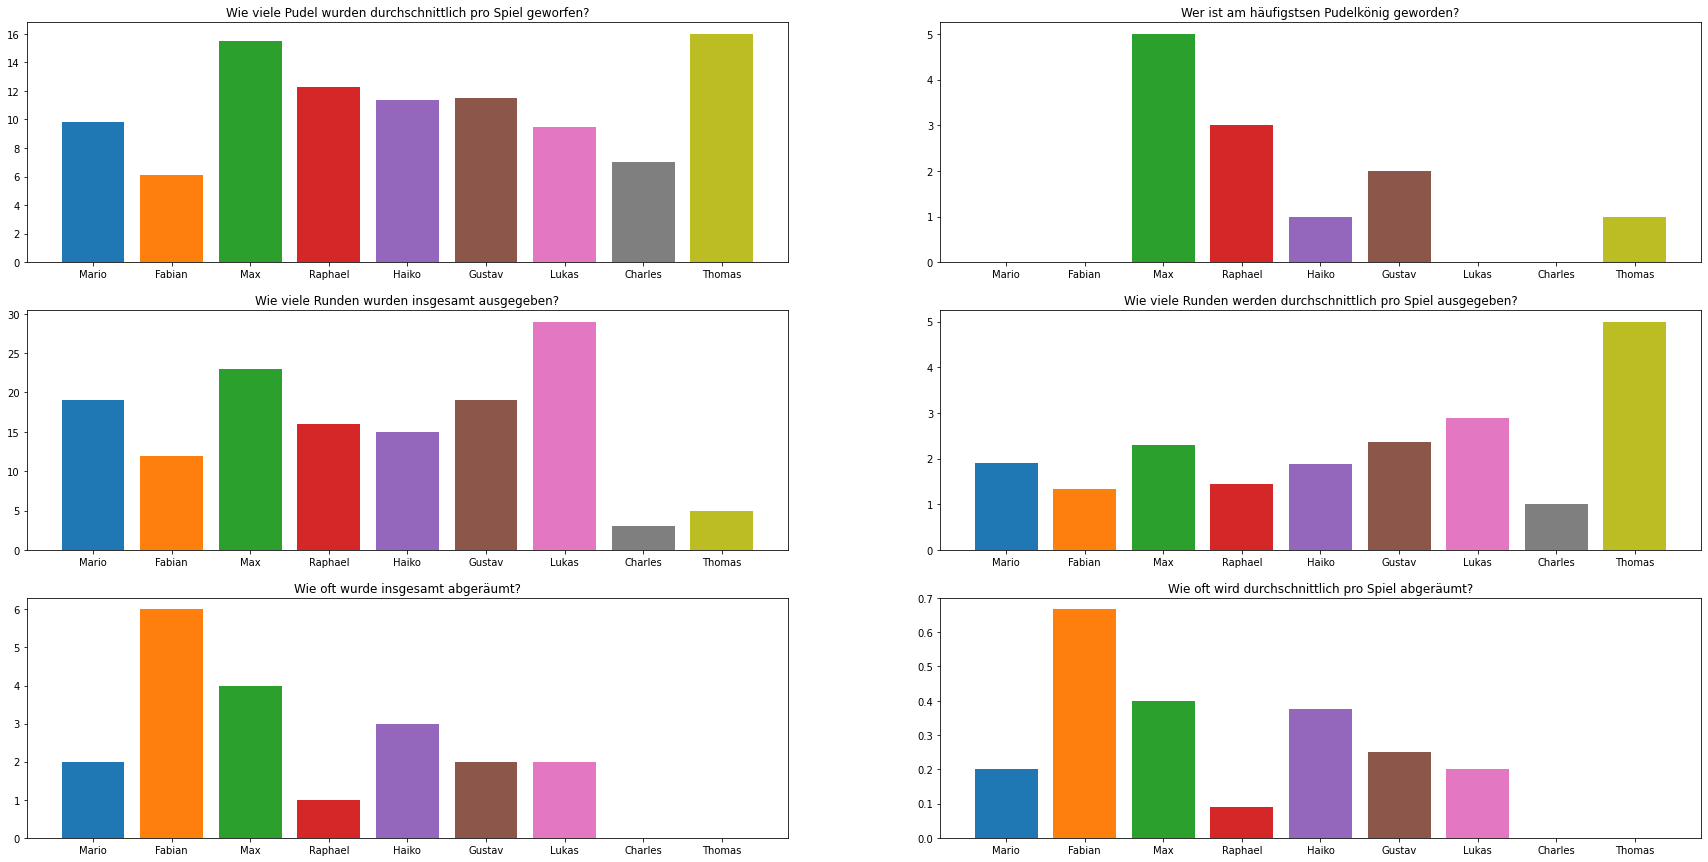

In [18]:
plot_for_season(dates)

# Ergebnisse für Season 2


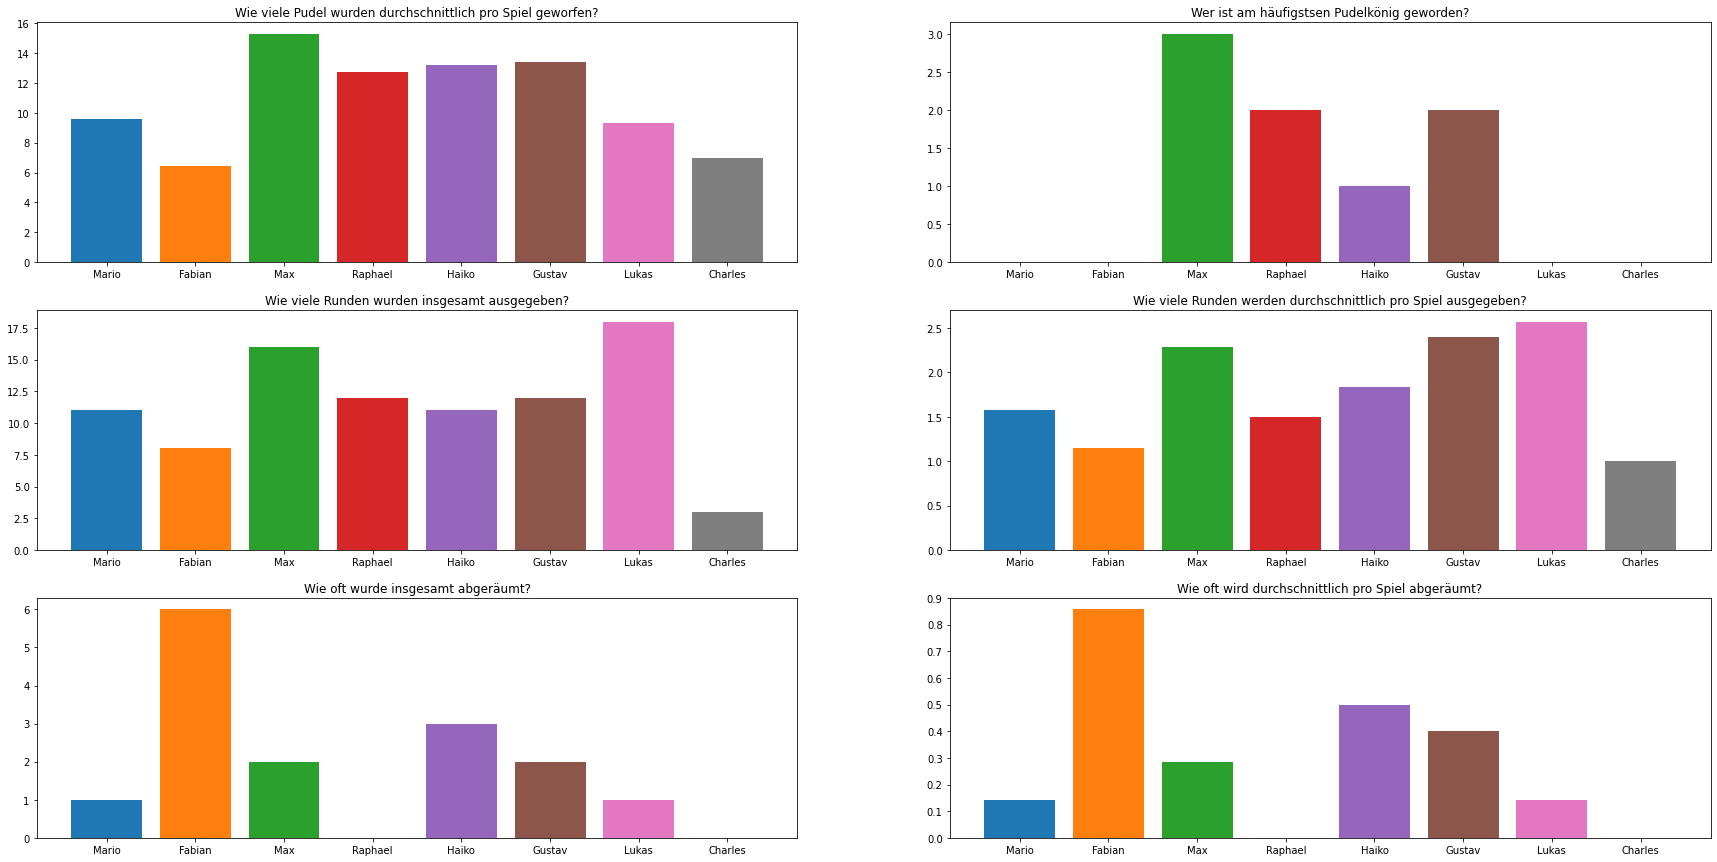

In [19]:
plot_for_season(season_2)

# Ergebnisse für Season 3

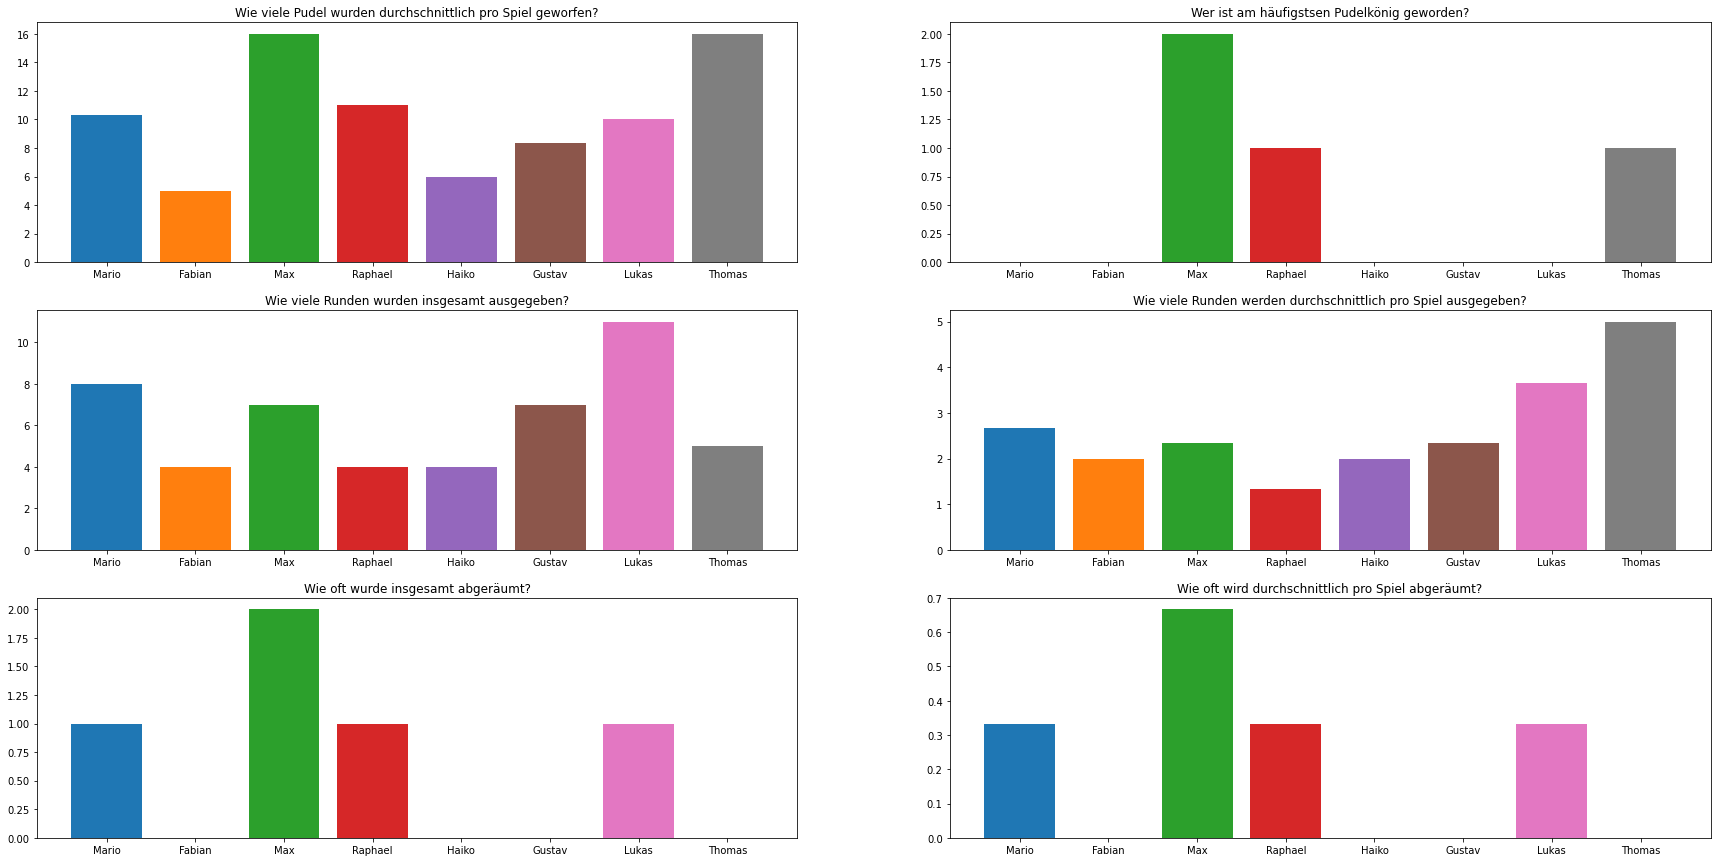

In [20]:
plot_for_season(season_3)